In [1]:
from mxnet import nd
import matplotlib.pyplot as plt

## __Defining Inverse Square Root Linear Unit function__

In [3]:
def isrlu(x, alpha = 1.0):
    x = nd.where(x < 0, x/(nd.sqrt(1 + alpha * nd.square(x))), x)
    return x

Below we are generating x values from range -10 to 10 with subsequent value of 0.1, that is last point -10, then -10 + 0.1 = -9.9, then -9.9 + 0.1 = -9.8.... and so on. This is what nd.arange function does

In [5]:
xs = nd.arange(-10, 10, 0.1)
ys = isrlu(xs)

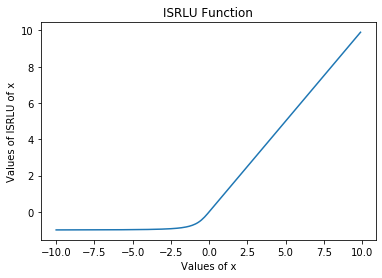

In [6]:
# matplotlib doesn't support mxnet's ndarray but it supports numpy's ndarray, so we need to convert xs and ys to numpy ndarray by calling .asnumpy() method
plt.plot(xs.asnumpy(), ys.asnumpy())
plt.xlabel('Values of x')
plt.ylabel('Values of ISRLU of x')
plt.title('ISRLU Function')
plt.show()

## __Lets see how ISRLU changes as we change alpha paramter__

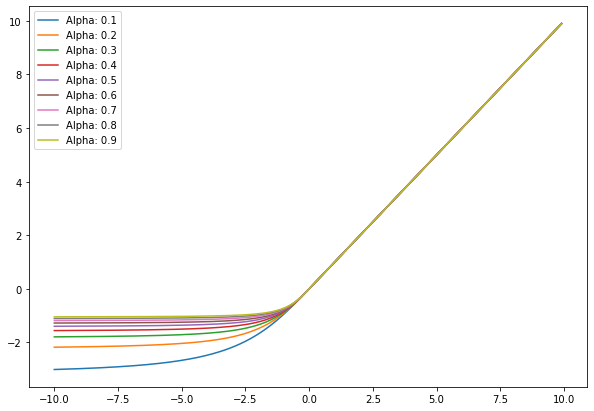

In [7]:
alphas = nd.arange(0.1, 1.0, 0.1)
plt.figure(figsize = (10, 7))
for alpha in alphas:
    plt.plot(xs.asnumpy(), isrlu(xs, alpha).asnumpy(), label = f'Alpha: {alpha.asscalar():.1f}')
plt.legend()
plt.show()

So as we increases alpha the range output value when the input is negative tends to -1

## __Now defining derivative of isrlu funciton__

In [8]:
def isrlu_derivative(x, alpha = 1.0):
    x = nd.where(x < 0, nd.square(1.0/nd.sqrt(1.0 + alpha * nd.square(x))), nd.ones_like(x))
    return x

In [9]:
dxs = nd.arange(-10, 10, 0.1)
dys = isrlu_derivative(xs)

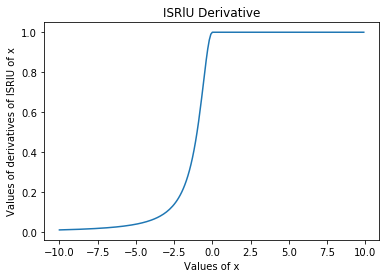

In [10]:
# matplotlib doesn't support mxnet's ndarray but it supports numpy's ndarray, so we need to convert xs and ys to numpy ndarray by calling .asnumpy() method
plt.plot(dxs.asnumpy(), dys.asnumpy())
plt.xlabel('Values of x')
plt.ylabel('Values of derivatives of ISRlU of x')
plt.title('ISRlU Derivative')
plt.show()

## __Lets see how the derivative of ISRLU changes as we change alpha paramter__

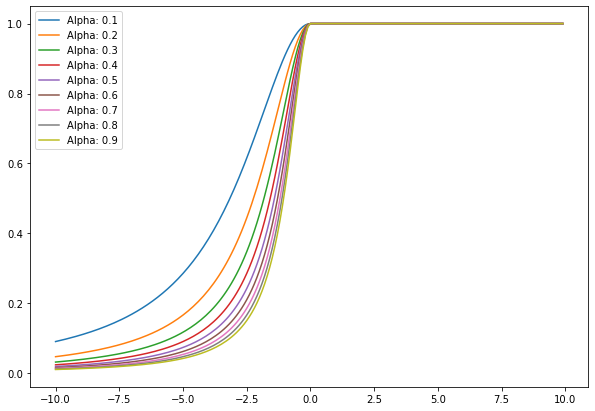

In [11]:
alphas = nd.arange(0.1, 1.0, 0.1)
plt.figure(figsize = (10, 7))
for alpha in alphas:
    plt.plot(xs.asnumpy(), isrlu_derivative(xs, alpha).asnumpy(), label = f'Alpha: {alpha.asscalar():.1f}')
plt.legend()
plt.show()

## __Plotting ISRLU function and it's derivative together for alpha = 1.0__

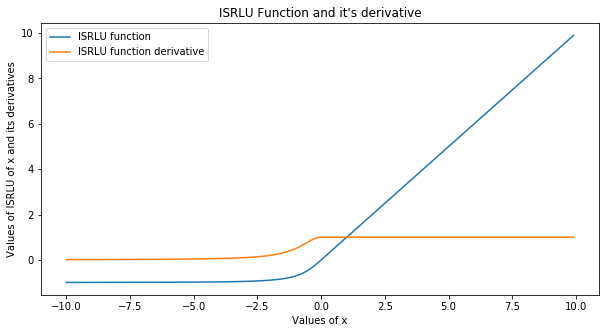

In [12]:
# matplotlib doesn't support mxnet's ndarray but it supports numpy's ndarray, so we need to convert xs and ys to numpy ndarray by calling .asnumpy() method
plt.figure(figsize = (10, 5))
plt.plot(xs.asnumpy(), ys.asnumpy(), label = 'ISRLU function')
plt.plot(dxs.asnumpy(), dys.asnumpy(), label = 'ISRLU function derivative')
plt.xlabel('Values of x')
plt.ylabel('Values of ISRLU of x and its derivatives')
plt.title("ISRLU Function and it's derivative")
plt.legend()
plt.show()

In [13]:
dys.max().asscalar() # getting the maximum value of the isru derivatives

1.0

Note the fact that maximum value of derivative is independent of the value of alpha